# Geodata Preprocessing

In [1]:
%matplotlib inline

*Imports*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy import stats

*Parameters*

In [3]:
grid_height = 500
grid_width = 500
citizen_count = 100000

*Load dataset of points of interest*

In [4]:
interest_points = pd.read_csv('data/med_interest_points.csv', usecols=['X', 'Y', 'TIPO_SITIO', 'NOMBRE', 'TIPO_IMPORTANCIA'])
interest_points.columns = ['X', 'Y', 'PLACE_TYPE', 'NAME', 'IMPORTANCE']

*Peak data*

In [5]:
interest_points.head()

,X,Y,PLACE_TYPE,NAME,IMPORTANCE
0,-75.576213,6.300599,Parque,RAFAEL J. MEJIA,Baja
1,-75.572723,6.308859,Centro de Cultura Religiosa,PARROQUIA SAN JUAN BAUTISTA PRECURSOR,Alta
2,-75.582716,6.303991,Centro de Cultura Religiosa,IGLESIA PENTECOSTAL UNIDA DE COLOMBIA,Medio
3,-75.574496,6.302770,Edificios,LONDOÑO ALZATE,Medio
4,-75.576978,6.289521,Edificios,SANCHEZ RESTREPO,Medio


*Dataset's structure*

In [6]:
interest_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           14245 non-null  float64
 1   Y           14245 non-null  float64
 2   PLACE_TYPE  14245 non-null  object 
 3   NAME        14245 non-null  object 
 4   IMPORTANCE  14222 non-null  object 
dtypes: float64(2), object(3)
memory usage: 556.6+ KB


*Sort interest points by importance*

In [7]:
interest_points = interest_points.sort_values(by='IMPORTANCE')
interest_points = interest_points.drop(columns=['IMPORTANCE'])

*Peak place types*

In [8]:
interest_points.PLACE_TYPE.value_counts()

Edificios                      6058
Señalización                   1718
Conjuto Residencial            1328
Comercio                        711
Escuelas Colegios               486
Centro de Cultura Religiosa     449
Cancha                          384
RPH                             363
Industria                       284
Otros                           281
Hoteles                         240
Parque                          222
Centros Comerciales             197
Instituto Educativo             191
Clinica Hospitales              160
Entidades Financieras           116
Oficina                         107
Tanque                           96
Parqueaderos                     89
Estaciones de Servicio           86
Club Social                      65
Bares Discotecas                 64
Universidades                    48
Supermercados                    45
Restaurantes                     42
Bodega                           40
Estaciones Policia               40
Ancianato                   

*Encode place types*

In [9]:
le = LabelEncoder()
interest_points.PLACE_TYPE = le.fit_transform(interest_points.PLACE_TYPE)
classes = list(le.classes_)
classes

['Ancianato',
 'Bares Discotecas',
 'Biblioteca',
 'Bodega',
 'CAI',
 'Cancha',
 'Centro de Cultura Religiosa',
 'Centros Comerciales',
 'Clinica Hospitales',
 'Club Social',
 'Comercio',
 'Condominio',
 'Conjuto Residencial',
 'Droguerias',
 'Edificios',
 'Embajadas Consulados',
 'Entidades Financieras',
 'Escuelas Colegios',
 'Estaciones Policia',
 'Estaciones de Bombero',
 'Estaciones de Servicio',
 'Funeraria',
 'Gimnasio',
 'Hoteles',
 'Industria',
 'Instituto Educativo',
 'Monumento',
 'Museos',
 'Notarias',
 'Null',
 'Oficina',
 'Otros',
 'Parque',
 'Parqueaderos',
 'Piscina',
 'Plaza de Mercado',
 'Puente',
 'RPH',
 'Restaurantes',
 'Servidumbre',
 'Señalización',
 'Subestacion Electrica',
 'Supermercados',
 'Tanque',
 'Teatros y Cines',
 'Terminales Transporte',
 'Universidades',
 'ZonaVerde']

*Scatter plot of points of interest*

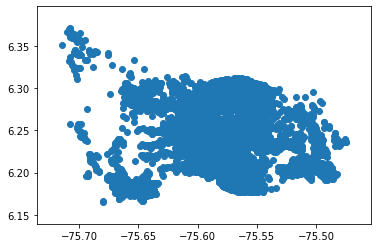

In [10]:
plt.scatter(interest_points.X, interest_points.Y)

*Remove outliers*

In [11]:
interest_points = interest_points[(np.abs(stats.zscore(interest_points.X)) < 3) & (np.abs(stats.zscore(interest_points.Y)) < 3)]

*Normalize X and Y*

In [12]:
interest_points['GX'] = (interest_points.X - interest_points.X.min())/(interest_points.X.max() - interest_points.X.min())
interest_points['GY'] = (interest_points.Y - interest_points.Y.min())/(interest_points.Y.max() - interest_points.Y.min())

*Scatter plot of normalized points of interest*

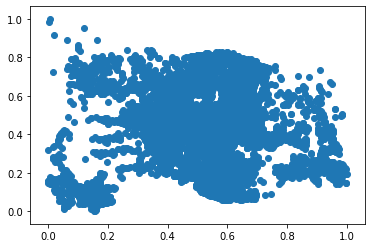

In [13]:
plt.scatter(interest_points.GX, interest_points.GY)

*Scale X and Y to fit grid size*

In [14]:
interest_points.GX = interest_points.GX * grid_width
interest_points.GY = interest_points.GY * grid_height

*Scatter plot of scaled points of interest*

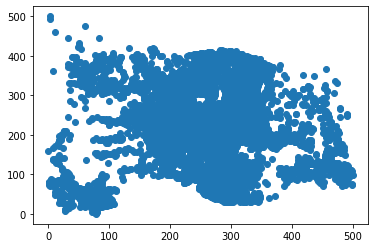

In [15]:
plt.scatter(interest_points.GX, interest_points.GY)

*Discretize space*

In [16]:
interest_points.GX = interest_points.GX.astype(int)
interest_points.GY = interest_points.GY.astype(int)

*Scatter plot of discrete points of interest*

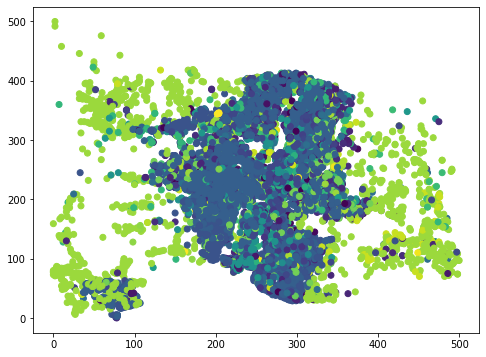

In [17]:
f, ax = plt.subplots(1, figsize=(8, 6))
plt.scatter(interest_points.GX, interest_points.GY, c=interest_points.PLACE_TYPE)

*Filter households and workplaces*

In [18]:
household_types = [11, 12, 14, 37]
workplace_types = [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 13, 15, 
                   16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 
                   27, 28, 30, 33, 38, 42, 44, 46]
households = interest_points[interest_points.PLACE_TYPE.isin(household_types)]
workplaces = interest_points[interest_points.PLACE_TYPE.isin(workplace_types)]

*Scatter plot of households and workplaces*

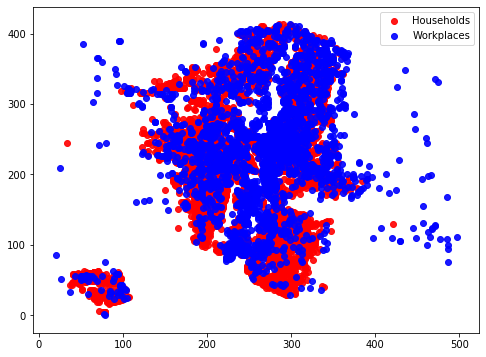

In [19]:
f, ax = plt.subplots(1, figsize=(8, 6))
plt.scatter(households.GX, households.GY, c='Red', alpha=0.9, label='Households')
plt.scatter(workplaces.GX, workplaces.GY, c='Blue', alpha=0.9, label='Workplaces')
plt.legend()

*Randomly select a household and workplace for each citizen*

In [20]:
citizen_household = households.sample(citizen_count, replace=True)[['GX', 'GY', 'PLACE_TYPE']].reset_index(drop=True)
citizen_workplace = workplaces.sample(citizen_count, replace=True)[['GX', 'GY', 'PLACE_TYPE']].reset_index(drop=True)

*Merge households and workplaces*

In [21]:
citizen_locations = pd.merge(citizen_household, citizen_workplace, left_index=True, right_index=True)
citizen_locations.columns = ['HOUSEHOLD_X', 'HOUSEHOLD_Y', 'HOUSEHOLD_TYPE', 'WORKPLACE_X', 'WORKPLACE_X', 'WORKPLACE_TYPE']

*Save citizen locations*

In [22]:
citizen_locations.to_csv('data/citizen_locations.csv')